In [1]:
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import roc_auc_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_stops = pd.read_csv('hw_2_stops.csv')

In [3]:
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
races = ['nan','asian','black','hispanic','other','white','native.american']
builds = ['unknown','thin','medium','muscular','heavy']
housings = ['neither','housing','transit']

data_stops['found.weapon']             = data_stops['found.weapon']            .map(lambda x: 1 if x == True else 0)
data_stops['found.gun']                = data_stops['found.gun']               .map(lambda x: 1 if x == True else 0)
data_stops['arrested']                 = data_stops['arrested']                .map(lambda x: 1 if x == True else 0)
data_stops['suspect.race']             = data_stops['suspect.race']            .map(lambda x: 0 if pd.isnull(x) else races.index(x))
data_stops['suspect.build']            = data_stops['suspect.build']           .map(lambda x: builds.index(x))
data_stops['suspect.sex']              = data_stops['suspect.sex']             .map(lambda x: 1 if x == 'male' else 0)
data_stops['suspect.weight']           = data_stops['suspect.weight']          .map(lambda x: 0 if pd.isnull(x) else 1 if x == 'male' else 0)
data_stops['stopped.bc.desc']          = data_stops['stopped.bc.desc']         .map(lambda x: 1 if x == True else 0)
data_stops['stopped.bc.violent']       = data_stops['stopped.bc.violent']      .map(lambda x: 1 if x == True else 0)
data_stops['stopped.bc.object']        = data_stops['stopped.bc.object']       .map(lambda x: 1 if x == True else 0)
data_stops['stopped.bc.other']         = data_stops['stopped.bc.other']        .map(lambda x: 1 if x == True else 0)
data_stops['stopped.bc.casing']        = data_stops['stopped.bc.casing']       .map(lambda x: 1 if x == True else 0)
data_stops['stopped.bc.lookout']       = data_stops['stopped.bc.lookout']      .map(lambda x: 1 if x == True else 0)
data_stops['stopped.bc.drugs']         = data_stops['stopped.bc.drugs']        .map(lambda x: 1 if x == True else 0)
data_stops['stopped.bc.clothing']      = data_stops['stopped.bc.clothing']     .map(lambda x: 1 if x == True else 0)
data_stops['stopped.bc.furtive']       = data_stops['stopped.bc.furtive']      .map(lambda x: 1 if x == True else 0)
data_stops['stopped.bc.bulge']         = data_stops['stopped.bc.bulge']        .map(lambda x: 1 if x == True else 0)
data_stops['inside.outside']           = data_stops['inside.outside']          .map(lambda x: 1 if x == True else 0)
data_stops['location.housing']         = data_stops['location.housing']        .map(lambda x: housings.index(x))
data_stops['officer.uniform']          = data_stops['officer.uniform']         .map(lambda x: 1 if x == True else 0)
data_stops['additional.report']        = data_stops['additional.report']       .map(lambda x: 1 if x == True else 0)
data_stops['additional.investigation'] = data_stops['additional.investigation'].map(lambda x: 1 if x == True else 0)
data_stops['additional.proximity']     = data_stops['additional.proximity']    .map(lambda x: 1 if x == True else 0)
data_stops['additional.evasive']       = data_stops['additional.evasive']      .map(lambda x: 1 if x == True else 0)
data_stops['additional.associating']   = data_stops['additional.associating']  .map(lambda x: 1 if x == True else 0)
data_stops['additional.direction']     = data_stops['additional.direction']    .map(lambda x: 1 if x == True else 0)
data_stops['additional.highcrime']     = data_stops['additional.highcrime']    .map(lambda x: 1 if x == True else 0)
data_stops['additional.time']          = data_stops['additional.time']         .map(lambda x: 1 if x == True else 0)
data_stops['additional.sights']        = data_stops['additional.sights']       .map(lambda x: 1 if x == True else 0)
data_stops['additional.other']         = data_stops['additional.other']        .map(lambda x: 1 if x == True else 0)
data_stops['radio.run']                = data_stops['radio.run']               .map(lambda x: 1 if x == True else 0)
data_stops['day']                      = data_stops['day']                     .map(lambda x: days.index(x))
data_stops['date']                     = pd.to_datetime(data_stops['date'], format='%Y-%m-%d')
data_stops['month']                    = data_stops['month']                   .map(lambda x: months.index(x) + 1)
data_stops['lat']                      = data_stops['lat']                     .map(lambda x: 0 if pd.isnull(x) else x)
data_stops['lon']                      = data_stops['lon']                     .map(lambda x: 0 if pd.isnull(x) else x)

In [4]:
data_stops.head()

,suspected.crime,found.weapon,found.gun,arrested,frisked,searched,summons.issued,found.contraband,force.hands,force.wall,...,additional.time,additional.sights,additional.other,radio.run,day,month,time.period,date,lat,lon
0,burglary,0,0,0,True,False,False,False,True,False,...,1,0,0,0,6,1,1,2011-01-01,40.699548,-73.832452
1,robbery,0,0,0,True,False,False,False,False,False,...,0,0,0,0,6,1,1,2011-01-01,40.752780,-73.866268
2,cpw,0,0,0,True,False,False,False,True,True,...,1,0,0,0,6,1,1,2011-01-01,40.587972,-73.807674
3,cpw,0,0,0,True,False,False,False,True,False,...,1,0,0,0,6,1,1,2011-01-01,40.587972,-73.807674
4,cpw,0,0,0,True,False,False,False,True,False,...,1,0,0,0,6,1,1,2011-01-01,40.587972,-73.807674


In [5]:
X = data_stops[['suspect.race','suspect.age','suspect.build','suspect.sex','suspect.height','suspect.weight','precinct',
         'inside.outside','location.housing','observation.period','officer.uniform','radio.run','day','month',
         'time.period','lat','lon']]

## Assignment 1

In [6]:
#b
Y = data_stops['arrested']
#a
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [7]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=1000)
rfc_fit = rfc.fit(X_train, Y_train)

In [8]:
Y_pred = rfc.predict(X_train)
print "Train Set Accuracy : %0.2f%%" % (100.0*sum(Y_train==Y_pred)/len(Y_pred))
Y_pred = rfc.predict(X_test)
print "Test Set Accuracy : %0.2f%%" % (100.0*sum(Y_test==Y_pred)/len(Y_pred))

Train Set Accuracy : 99.99%
Test Set Accuracy : 94.30%


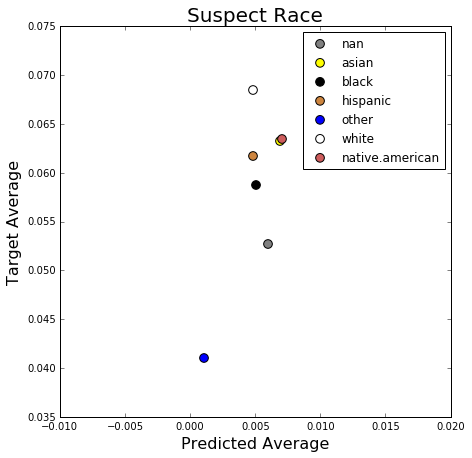

In [9]:
exp1 = pd.DataFrame({"race":list(X_test["suspect.race"]),"arrested_pred":list(Y_pred),"arrested_target":list(Y_test)})
exp11 = exp1.groupby(['race']).agg(mean)
exp11.columns = ("Predicted","Target")
racescol = list(['grey','yellow','black','peru','blue','white','indianred'])
plt.figure(figsize=(7,7))
ax=[]
for i in range(0,len(racescol)):
    ax1 = plt.scatter(exp11.Predicted[i],exp11.Target[i],c=racescol[i],s=75)
    ax.append(ax1)
plt.xlabel("Predicted Average",fontsize=16);
plt.ylabel("Target Average",fontsize=16);
plt.title("Suspect Race",fontsize=20);
plt.legend(ax,races, scatterpoints = 1);

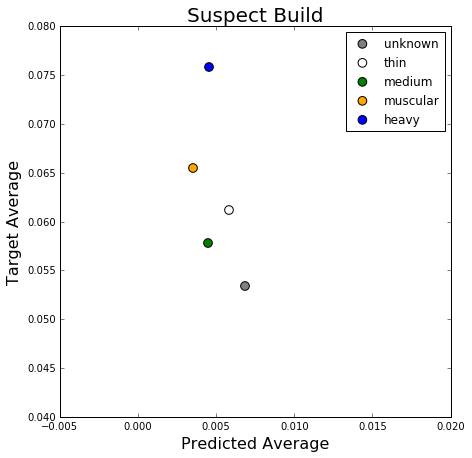

In [10]:
exp2 = pd.DataFrame({"build":list(X_test["suspect.build"]),"arrested_pred":list(Y_pred),"arrested_target":list(Y_test)})
exp21 = exp2.groupby(['build']).agg(mean)
exp21.columns = ("Predicted","Target")
buildscol = list(['gray','white','green','orange','blue'])
plt.figure(figsize=(7,7));
ax=[]
for i in range(0,len(buildscol)):
    ax1 = plt.scatter(exp21.Predicted[i],exp21.Target[i],c=buildscol[i],s=75)
    ax.append(ax1)
plt.xlabel("Predicted Average",fontsize=16);
plt.ylabel("Target Average",fontsize=16);
plt.title("Suspect Build",fontsize=20);
plt.legend(ax,builds, scatterpoints = 1);


I use the train_test_split to_split the data into 75% for train and 25% for test. Then I used arrested as the target variable. I trained the random forest on 1000 trees (It takes a long time). For Suspect Race and Suspect Build I plotted the average predicted values with the average target values.  

## Assignment 2

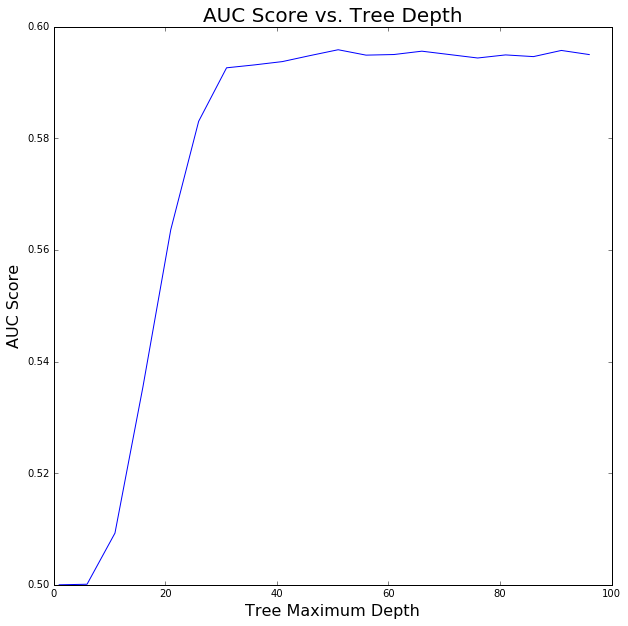

In [13]:
yplot = []
xplot = range(1,100,5)
for i in xplot:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc = dtc.fit(X_train, Y_train)
    yplot.append(roc_auc_score(Y_test, dtc.predict(X_test)))
    
plt.figure(figsize(10,10))
plt.plot(xplot,yplot)
plt.xlabel('Tree Maximum Depth',fontsize=16)
plt.ylabel('AUC Score',fontsize=16)
plt.title('AUC Score vs. Tree Depth',fontsize=20)

In [14]:
dtc = DecisionTreeClassifier(max_depth=20)
dtc = dtc.fit(X_train, Y_train)

In [15]:
export_graphviz(dtc, feature_names=X.columns)

Using same split of data as in the previous assignment, I used max_depth as the simplicity variable. Then I ploted the AUC score vs. the depth for from 1-100. Finally I visualzed a decision tree with max_depth=20 using export_graphviz as suggested attached as a dot file together with this file.